In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
DATASET_PATH = "D:\DS-DAY3\images"
IMG_SIZE = 64
data, labels = [], []
for file in os.listdir(DATASET_PATH):
    img_path = os.path.join(DATASET_PATH, file)
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
    if img is None: 
        print(f"Skipping unreadable file: {file}")
        continue
    
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0 
    
    data.append(img)
    label = 0 if "cat" in file else 1 
    labels.append(label)
data = np.array(data, dtype=np.float32)
labels = np.array(labels)
labels = tf.keras.utils.to_categorical(labels, num_classes=2)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

C:\Users\kavip\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.1117 - val_accuracy: 1.0000 - val_loss: 0.3182
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 1.0000 - loss: 0.3981 - val_accuracy: 1.0000 - val_loss: 0.0840
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.1306 - val_accuracy: 1.0000 - val_loss: 0.0242
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 1.0000 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0029


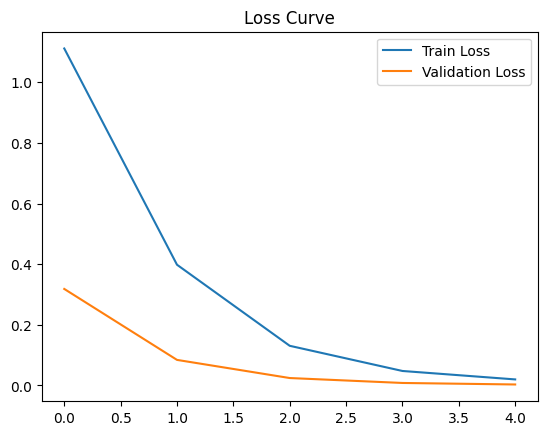

Final Training Accuracy: 100.00%
Final Validation Accuracy: 100.00%


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.2%}")
print(f"Final Validation Accuracy: {val_acc:.2%}")